___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 5<br><br>CNN Syntax Basics<br><br>MNIST Data<br><h1>

# Dataset Info

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support-vector machine to get an error rate of 0.8%.

![3Dto2D](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png)

In [76]:
#el yazisi ile yazilmis rakamlar var , CNN de model resimlerle besleniyor

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [78]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

In [79]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data, data setini yüklerken otomatik train test split yapti

In [80]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [81]:
# Checking the shape of one image
X_train[9].shape

(28, 28)

In [82]:
X_train[9]  #9. resmin pixel degeri, 0= siyah a denk gelir, max beyaz =255,aradakiler de gri tonlari

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 189, 190,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 143, 247, 153,   0,   0,
          0,   0],
       [  

In [141]:
len(load_data())

2

In [142]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")  

There are  60000 images in the training dataset
There are  10000 images in the test dataset


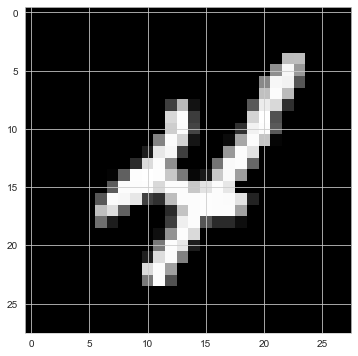

In [83]:
plt.imshow(X_train[9], cmap='gray')
#plt.matshow(X_train[9])

In [84]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [85]:
y_train[9]  # 4 rakamina karsilik geliyormus,gercek degeri 4

4

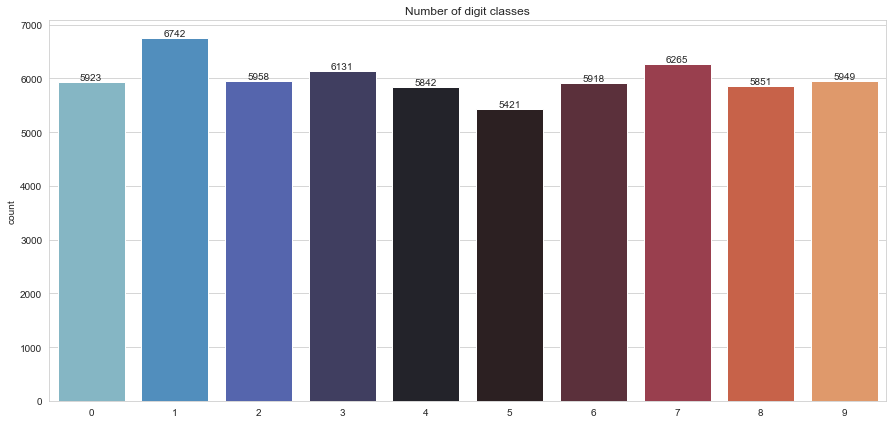

In [140]:
# visualize number of digits classes

plt.figure(figsize=(15,7))
ax = sns.countplot(y_train, palette="icefire")
plt.title("Number of digit classes")

for container in ax.containers:
    ax.bar_label(container)

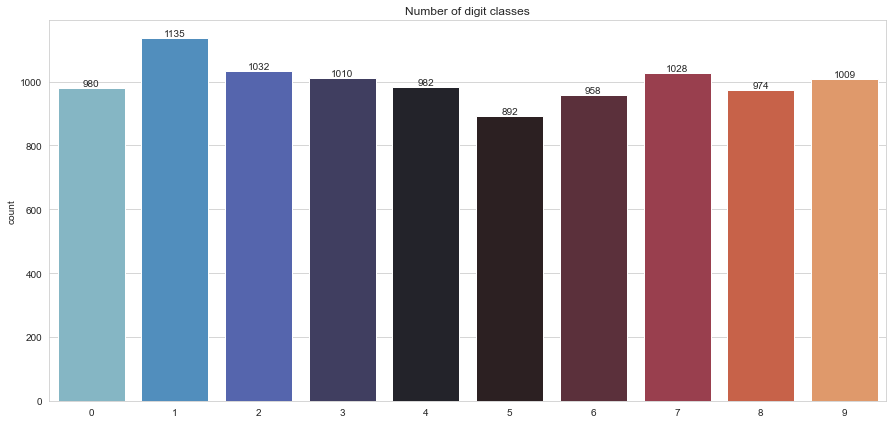

In [143]:
# visualize number of digits classes

plt.figure(figsize=(15,7))
ax = sns.countplot(y_test, palette="icefire")
plt.title("Number of digit classes")

for container in ax.containers:
    ax.bar_label(container)

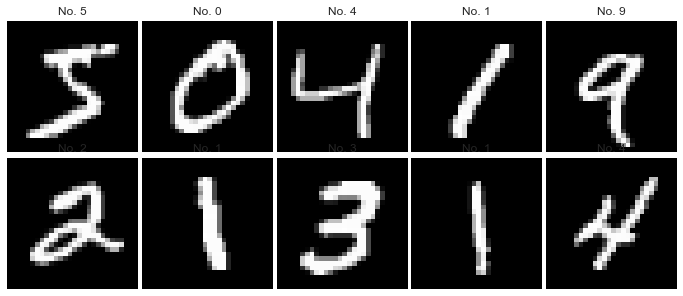

In [86]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

In [87]:
X_train[9].min()

0

In [88]:
X_train[9].max()

255

In [89]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [90]:
X_train[9].min()

0.0

In [91]:
X_train[9].max()  #0 ile 1 araligina cekiyoruz, normalization yapilmali

1.0

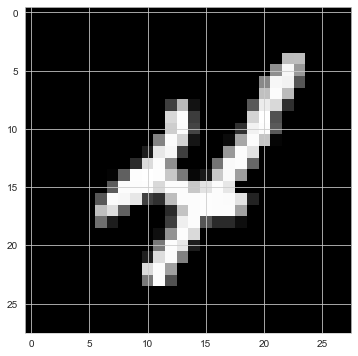

In [92]:
plt.imshow(X_train[9], cmap='gray')  #imshow da 1 e dönüstürmek problem degil, 0 dan 255 e cekiyor

In [93]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [94]:
X_train.reshape(60000, 28, 28, 1).shape   #chanel sayisi 1, black white oldugu icin 1

(60000, 28, 28, 1)

In [95]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) #0. degeri 60000,yukaridaki formattan asagidaki formata cevirdik, 
                                                       #resim ve chanel sayisi vermemiz gerekiyor
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [96]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [97]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [98]:
y_train.shape

(60000,)

In [99]:
from tensorflow.keras.utils import to_categorical  #sayilari görmedigi icin categorical yapiyoruz

In [100]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [101]:
y_train[9]

4

In [102]:
Y_train[9]  #normalde Y 60 bindi, 10 sütun olustudu bir dönüsüm yapti 0 1 lere dönüstü

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
#CNN kurmaya basliyoruz, 2 boyutlu conv.

In [104]:
model = Sequential()  #modeli kuruyoruz, ard arda geldigi icin sequential

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid ,default u bunlar
                                                       #28 26 ya iner
model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid #13 e 13 lük 2 resim var artik

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))    #multiclass ise sadece softmax kullaniliyor, binary ise softmax ya da sigmoid kullanilabilir
                                              #sigmoid sadece binary de kullaniliyor

model.compile(loss='categorical_crossentropy',    #multiclass bir uygulama oldugu icin crossentropy yi kullandik, binary olsaydi binary kullanilirdi
              optimizer='adam',
              metrics=['accuracy'])
              
# Conv2D layer'ı için: 3'e 3'lük 32 filtre koy. input_shape 28,28,1 olsun. dedim

# genelde 28 lik, 32 lik fotoğraflar için 2,2 pool idealdir. MaxPool2D layer ı için 2,2 belirledik.

# multi_class olduğundan categorical_crossentropy kullanıldı. Binary olsaydı binary_crossentropy kullanılacaktı

**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

In [ ]:
#CNN cok cabuk over fitting e gidebilir

In [105]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [106]:
((3 * 3 * 1) + 1) * 32

320

In [107]:
from tensorflow.keras.callbacks import EarlyStopping

In [108]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)
#early stop ile over fitting i engelleyebiliyoruz, val_acuracy olsaydi max almak gerekirdi, patienceyi 2 aldik over fitting tehlikesinden dolayi
#restore katsayilari muhafaza ediyordu

In [109]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1457 - accuracy: 0.9568 - val_loss: 0.0626 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0509 - accuracy: 0.9846 - val_loss: 0.0481 - val_accuracy: 0.9847
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0319 - accuracy: 0.9895 - val_loss: 0.0425 - val_accuracy: 0.9856
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0449 - val_accuracy: 0.9868
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0457 - val_accuracy: 0.9871


In [110]:
#loss degisiyor ama epoch bitince ortalamasini aliyor

In [111]:
model.metrics_names

['loss', 'accuracy']

In [112]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.146,0.957,0.063,0.981
1,0.051,0.985,0.048,0.985
2,0.032,0.989,0.042,0.986
3,0.021,0.994,0.045,0.987
4,0.015,0.995,0.046,0.987


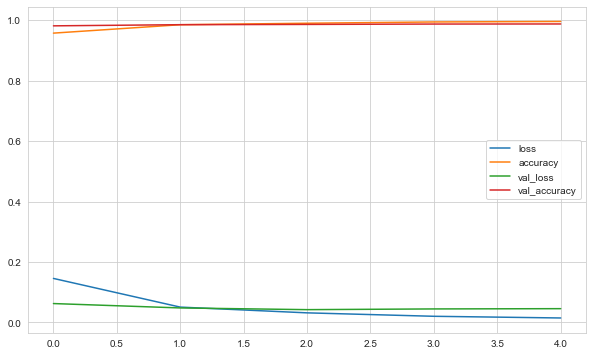

In [113]:
summary.plot(); #yesil maviler loss lar,resimlerde daha hizli düsüs olmus, daha iyi ögrenme oluyor
#data sayisinin cok olmasi gerekiyor 10 binler ve daha fazlasi

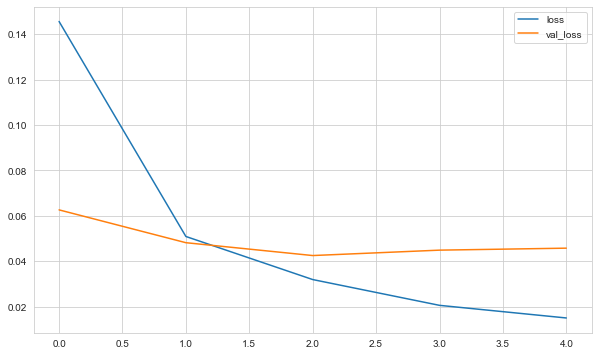

In [114]:
summary[["loss", "val_loss"]].plot(); #hata 0.16 dan önce 0.06 lara sonra  0.002 lere düstü

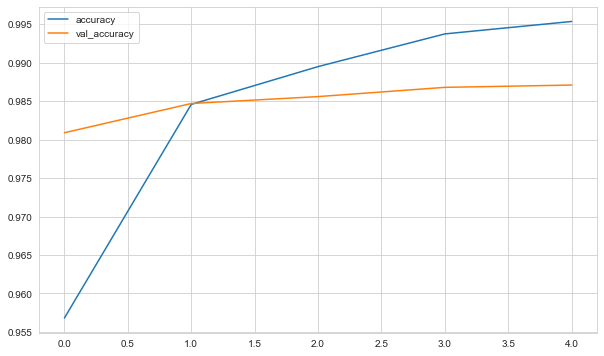

In [115]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [116]:
from sklearn.metrics import classification_report, confusion_matrix #classification oldugu icin onu kullaniyoruz

In [117]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0425 - accuracy: 0.9856


[0.042482275515794754, 0.9855999946594238]

In [118]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.042482275515794754
Test accuracy: 0.9855999946594238


In [119]:
pred_prob = model.predict(X_test)  #X_test te 10 bin data vardi, 10 class oldugu icin 10 elemanli bir array verecek
pred_prob

313/313 [==============================] - 1s 3ms/step


array([[1.5315779e-08, 1.2493723e-08, 3.5260457e-06, ..., 9.9999487e-01,
        5.7578653e-08, 1.2713925e-06],
       [6.9966808e-07, 3.2543039e-04, 9.9954909e-01, ..., 4.7402220e-09,
        8.5376705e-06, 2.5113023e-09],
       [1.0747315e-06, 9.9962521e-01, 2.0827242e-06, ..., 2.7287487e-04,
        5.1999177e-05, 6.6212351e-07],
       ...,
       [2.4008353e-13, 2.1733515e-09, 1.0243897e-11, ..., 2.4027976e-08,
        2.0169134e-07, 4.0910734e-07],
       [1.7249772e-06, 3.1759186e-08, 2.6028474e-10, ..., 4.7248918e-07,
        6.6056382e-04, 6.1189070e-08],
       [1.1172247e-08, 4.2528409e-10, 8.7329610e-09, ..., 2.5145111e-10,
        1.1580508e-08, 4.7423034e-11]], dtype=float32)

In [120]:
pred_prob.shape

(10000, 10)

In [121]:
pred_prob[0]   #bu degerlerin hangisi büyükse 7. argüman, index daha büyükmüs 0.99 neredeyse 1 demek

array([1.5315779e-08, 1.2493723e-08, 3.5260457e-06, 2.4362708e-07,
       4.1647117e-09, 1.6658900e-11, 1.4367466e-12, 9.9999487e-01,
       5.7578653e-08, 1.2713925e-06], dtype=float32)

In [122]:
np.argmax(pred_prob[0])  #7. eleman en büyükmüs

7

In [123]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [124]:
y_pred.shape

(10000,)

In [125]:
print(classification_report(y_test, y_pred))
#10 sinifim var 10 siniftan prec. recall f1-score u görüyorum, iyi bir sonuc elde edilmis

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [126]:
print(confusion_matrix(y_test, y_pred))

[[ 973    0    0    0    1    0    3    1    2    0]
 [   0 1128    3    0    0    0    2    1    1    0]
 [   2    3 1007    1    1    0    3    7    8    0]
 [   0    0    1  987    0    5    0    7    9    1]
 [   1    1    0    0  969    0    1    0    3    7]
 [   2    0    0    5    0  873    5    0    7    0]
 [   2    2    0    0    1    1  950    0    2    0]
 [   0    0    5    1    0    0    0 1021    1    0]
 [   3    0    1    0    0    0    1    2  965    2]
 [   1    4    0    2   11    1    0    6    1  983]]


In [127]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [128]:
(y_test != y_pred).sum()

144

# Prediction

In [129]:
my_number = X_test[3]

In [130]:
my_number.shape

(28, 28, 1)

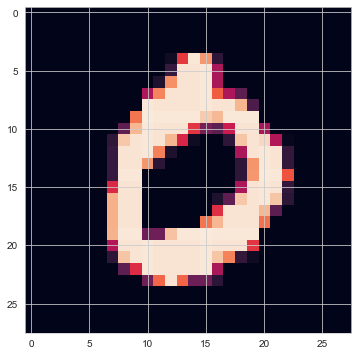

In [131]:
plt.imshow(my_number.reshape(28,28));

In [132]:
pred_prob = model.predict(my_number.reshape(1,28,28,1)) #chanel sayisi, kac resim oldugu, gibi 4 deger buraya yazmak gerekiyor
pred_prob

1/1 [==============================] - 0s 28ms/step


array([[9.9972814e-01, 2.0762945e-06, 1.8701860e-05, 2.1804071e-07,
        3.6786164e-06, 1.7232993e-06, 1.8651178e-04, 2.5854411e-05,
        2.6545536e-07, 3.2731758e-05]], dtype=float32)

In [133]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

0

In [134]:
model.save("cnn-1.h5")  #modeli save ediyoruz

In [135]:
#buradaki numaralarin resmi birbirine cok benzemedigi icin sonuc daha güzel cikar, kolay classify eder

Using

In [136]:
model=tf.keras.models.load_model('cnn-1.h5')

In [137]:

pred=model.predict(np.expand_dims(X_test[47],axis=0))



1/1 [==============================] - 0s 79ms/step


In [138]:
np.argmax(pred)

2

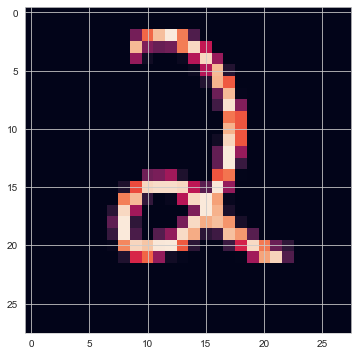

In [139]:
plt.imshow(X_test[47].reshape(28,28))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___